_Neural Data Science_

Lecturer: Jan Lause, Prof. Dr. Philipp Berens

Tutors: Jonas Beck, Rita González Márquez, Fabio Seel

Summer term 2024

Student names: <span style='background: yellow'>*FILL IN YOUR NAMES HERE* </span>

# Coding Lab 1

- __Data__: Download the data file ```nds_cl_1.csv``` from ILIAS and save it in a subfolder ```../data/```.
- __Dependencies__: You don't have to use the exact versions of all the dependencies in this notebook, as long as they are new enough. But if you run "Run All" in Jupyter and the boilerplate code breaks, you probably need to upgrade them.


Recommended folder structure:

```
.
├── data/
│   └── nds_cl_1.csv
├── notebooks
│   └── CodingLab1.ipynb
├── matplotlib_style.txt
└── requirements.txt
```

In [ ]:
%pip install watermark

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import PCA
from __future__ import annotations  # for Python 3.8 and below
from scipy.signal import butter, filtfilt, find_peaks, peak_prominences
from sklearn.preprocessing import StandardScaler

# black is a code formatter (see https://github.com/psf/black).
# It will automatically format the code you write in the cells imposing consistent Python style.
%load_ext jupyter_black

%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark -p sklearn

Last updated: 2024-04-27 21:19:54CEST

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

sklearn: 1.3.0

scipy     : 1.11.1
numpy     : 1.24.3
matplotlib: 3.7.2
pandas    : 2.0.3

Watermark: 2.4.3



In [2]:
# matplotlib style file
# Template for style file: https://matplotlib.org/stable/tutorials/introductory/customizing.html#customizing-with-style-sheets
plt.style.use("../matplotlib_style.txt")

## Load data

In [3]:
fs = 30000.0  # sampling rate of the signal in Hz
dt = 1 / fs
cols = ["Ch1", "Ch2", "Ch3", "Ch4"]
x = pd.read_csv("../data/nds_cl_1.csv", header=0, names=cols)

In [4]:
x.describe()

,Ch1,Ch2,Ch3,Ch4
count,1.920000e+07,1.920000e+07,1.920000e+07,1.920000e+07
mean,3.600331e+00,-8.850918e-01,2.864284e-01,2.210982e+00
std,5.824474e+02,6.014818e+02,6.464363e+02,6.126105e+02
min,-3.607000e+03,-3.739000e+03,-3.871000e+03,-3.750000e+03
25%,-3.460000e+02,-3.610000e+02,-3.950000e+02,-3.640000e+02
50%,1.200000e+01,8.000000e+00,-1.000000e+00,1.000000e+01
75%,3.650000e+02,3.720000e+02,4.010000e+02,3.810000e+02
max,2.873000e+03,3.004000e+03,3.099000e+03,3.017000e+03


## Task 1: Filter Signal

In order to detect action potentials, the first step is to filter out low frequency fluctuations (LFP) and high frequency noise. Determine appropriate filter settings and implement the filtering in the function ```filter_signal()```. A typical choice for this task would be a <mark>butterworth filter</mark>. Plot a segment of the raw signal and the filtered signal for all four channels with matching y-axis. The segment you choose should contain spikes. When you apply the function also test different filter settings.

*Grading: 2 pts*


In [ ]:
def filter_signal(
    x: pd.DataFrame, fs: float, low: float, high: float, order: int = 3
) -> pd.DataFrame:
    """Filter raw signal x

    Parameters
    ----------

    x: pd.DataFrame, (n_samples, n_channels)
        Each column in x is one recording channel.

    fs: float
        Sampling frequency.

    low, high: float, float
        Passband in Hz for the butterworth filter.

    order: int
        The order of the Butterworth filter. Default is 3, but you should try
        changing this and see how it affects the results.


    Returns
    -------

    y: pd.DataFrame, (n_samples, n_channels)
        The filtered x. The filter delay is compensated in the output y.


    Notes
    ----

    1. Try exploring different filters and filter settings. More info:
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html

    2. The output signal should be phase-shift compensated. More info:
    https://dsp.stackexchange.com/a/19086

    """

    # Calculate critical frequencies normalized to Nyquist frequency
    # nyquist = 0.5 * fs
    low_cut = low / fs
    high_cut = high / fs

    # Design Butterworth filter
    b, a = butter(order, [low_cut, high_cut], btype="band")

    # Apply filter to each channel
    filtered_data = filtfilt(b, a, x, axis=0)

    # Convert filtered data back to DataFrame with the same structure
    y = pd.DataFrame(filtered_data, columns=x.columns)

    return y

In [70]:
xf = filter_signal(x, fs, 200, 4000)

In [71]:
xf.head()

,Ch1,Ch2,Ch3,Ch4
0,1.789986,5.367520,-17.358661,-8.428626
1,-10.208975,3.643353,-22.720619,-17.173313
2,-21.625792,1.968209,-27.930777,-25.530306
3,-31.817283,0.447048,-32.742990,-33.107735
4,-40.097193,-0.756449,-36.777886,-39.509945


In [72]:
x.head()

,Ch1,Ch2,Ch3,Ch4
0,-141,-184,-316,-191
1,-136,-167,-290,-196
2,-168,-185,-306,-219
3,-147,-188,-332,-219
4,-165,-196,-331,-206


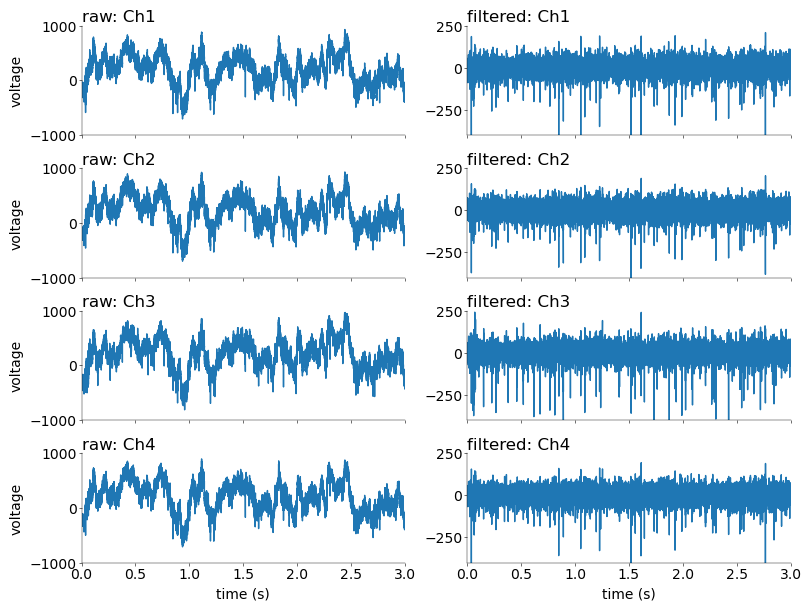

In [73]:
mosaic = [
    ["raw: Ch1", "filtered: Ch1"],
    ["raw: Ch2", "filtered: Ch2"],
    ["raw: Ch3", "filtered: Ch3"],
    ["raw: Ch4", "filtered: Ch4"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 6), layout="constrained", dpi=100
)

# -----------------------------------------------------------------
# Plot raw and filtered signal segments for all 4 channels (0.5 pt)
for i, m in enumerate(mosaic):
    raw = m[0]
    filtered = m[1]
    ax[raw].plot(x.index / fs, x[cols[i]])
    ax[raw].set_xlim((0, 3))
    ax[raw].set_ylim((-1000, 1000))

    ax[filtered].plot(x.index / fs, xf[cols[i]])
    ax[filtered].set_xlim((0, 3))
    ax[filtered].set_ylim((-400, 250))

    ax[raw].set_ylabel("voltage")
    ax[filtered].set_title(m[1], loc="left")

    ax[raw].set_title(m[0], loc="left")

    if i != 3:
        ax[raw].set_xticklabels([])
        ax[filtered].set_xticklabels([])
    else:
        ax[raw].set_xlabel("time (s)")
        ax[filtered].set_xlabel("time (s)")

# -----------------------------------------------------------------

for i, m in enumerate(mosaic):
    raw = m[0]
    filtered = m[1]
    ax[raw].set_xlim((0, 3))
    ax[raw].set_ylim((-1000, 1000))

    ax[filtered].set_xlim((0, 3))
    ax[filtered].set_ylim((-400, 250))

    ax[raw].set_ylabel("voltage")
    ax[filtered].set_title(m[1], loc="left")

    ax[raw].set_title(m[0], loc="left")

    if i != 3:
        ax[raw].set_xticklabels([])
        ax[filtered].set_xticklabels([])
    else:
        ax[raw].set_xlabel("time (s)")
        ax[filtered].set_xlabel("time (s)")

## Task 2: Detect action potentials

Action potentials are usually detected by finding large-amplitude deflections in the continuous signal. A good choice of threshold for detecting spikes is important. If it is too low, you will detect too many low amplitude events (noise); if it is too high, you run the risk of missing good spikes. Implement an automatic procedure to obtain a reasonable threshold and detect the times when spikes occurred in the function ```detect_spikes()``` . Plot a segment of the filtered signal for all four channels with matching y-axis and indicate the time points where you detected spikes. **Plot the threshold**. Are the detected time points well aligned with peaks in the signal?

*Grading: 3 pts*

In [74]:
def detect_spikes(
    x: np.ndarray, fs: float, N: int = 5, lockout: int = 10
) -> tuple[np.ndarray, np.ndarray, np.float64]:
    """Detect spikes, in this case, the relative local minima of the signal x.

    Parameters
    ----------

    x: np.array (n_samples, n_channels)
        The filtered signal from Task 1.

    fs: float
        the sampling rate (in Hz).

    N: int
        An arbitrary number with which you multiply with the standard deviation
        to set a threshold that controls your false positive rate. Default is 5
        but you should try changing it and see how it affects the results.

    lockout: int
        a window of 'refactory period', within which there's only one spike.
        Default is 10 but you should also try changing it.


    Returns
    -------

    s: np.array, (n_spikes, )
        Spike location / index in the singal x.

    t: np.array, (n_spikes, )
        Spike time in ms. By convention the time of the zeroth sample is 0 ms.

    thrd: float
        Threshold = -N * sigma.


    Tips
    ----

    Use scipy functions to detect local minima.
    Noted that there are four channels in signal x.

    """
    # insert your code here

    # -----------------------------------------------------------------------
    # compute the robust s.d. (0.5 pts) and calculate the threshold (0.5 pts)
    # -----------------------------------------------------------------------

    # -------------------------------
    # find all local minima (1.5 pts)
    # -------------------------------

    # Compute the robust standard deviation estimation of sigma
    sigma = np.median(np.abs(x - np.median(x))) / 0.6745

    # Calculate the threshold based on the robust standard deviation
    thrd = -N * sigma

    # Find local minima indices for each channel
    s = []
    for channel in range(len(x.columns)):
        minima_indices, _ = find_peaks(-x.iloc[:, channel], distance=lockout)
        s.extend(minima_indices)
    s = np.asarray(s)

    # Sort and remove duplicates
    s = np.unique(s)

    # Convert spike indices to spike times (ms)
    t = s / fs 

    return s, t, thrd

In [75]:
s, t, thrd = detect_spikes(xf, fs)

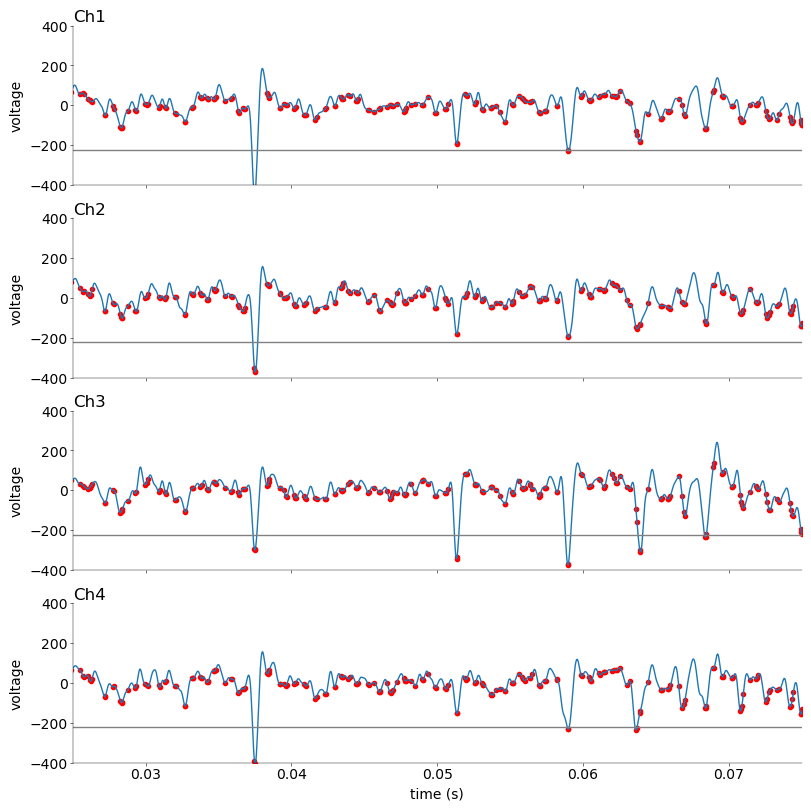

In [77]:
mosaic = [
    ["Ch1"],
    ["Ch2"],
    ["Ch3"],
    ["Ch4"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 8), layout="constrained", dpi=100
)

# --------------------------------------------
# plot threshold and detected spikes (0.5 pts)
# --------------------------------------------
t_start = 0
t_end = 5

# filter only the spikes to be plotted
t_spikes = [x for x in t if x >= t_start and x < t_end]
i_spikes = [x for x in s if x >= t_start * fs and x < t_end * fs]

for i, col in enumerate(cols):
    ax[col].set_ylim((-400, 400))
    ax[col].set_xlim((0.025, 0.075))
    ax[col].set_ylabel("voltage")

    ax[col].set_title(col, loc="left")

    if col != "Ch4":
        ax[col].set_xticklabels([])
    else:
        ax[col].set_xlabel("time (s)")

    # convert Hz into seconds for the x axis

    ax[col].plot(X, xf.iloc[t_start : t_end * int(fs), i])
    ax[col].hlines(thrd, t_start, t_end * fs, colors="grey")  # threshold bar
    ax[col].scatter(t_spikes, xf.iloc[i_spikes, i], c="red")  # spike points

## Task 3: Extract waveforms
For later spike sorting we need the waveforms of all detected spikes. Extract the waveforms segments (1 ms) on all four channels for each spike time (as a result each spike is represented by a 4x30 element matrix). Implement this procedure in the function ```extract_waveforms()```. Plot (a) the first 100 spikes you detected and (b) the 100 largest spikes you detected. Are there a lot of very small spikes (likely noise) among your detected spikes? If so your threshold may be too low. Can you see obvious artifacts, not looking like spikes at all?

*Grading: 2 pts*

In [84]:
def extract_waveforms(
    x: np.ndarray, s: np.ndarray, window_size_samples: int = 15
) -> np.ndarray:
    """Extract spike waveforms at times s (given in samples)
    from the filtered signal `x` using a fixed window around the
    times of the spikes.

    Parameters
    ----------
    x: np.ndarray (n_samples, n_channels)
        The filtered signal.

    s: np.ndarray, (n_spikes, )
        Spike time in samples.

    window_size_samples: int
        Number of samples to extract before and after each spike time (default is 15, equivalent to 1 ms).

    Return
    ------
    w: np.ndarray, (n_spikes, 2 * window_size_samples + 1, n_channels)
        Waveforms array containing extracted spike waveforms for each channel.
    """

    # Initialize an empty array to store spike waveforms
    n_spikes = len(s)
    n_channels = x.shape[1]
    waveform_length = 2 * window_size_samples + 1
    w = np.zeros((n_spikes, waveform_length, n_channels))

    # Extract spike waveforms around each spike time
    for i, spike_time in enumerate(s):
        if (
            spike_time - window_size_samples >= 0
            and spike_time + window_size_samples < len(x)
        ):
            waveform = x[
                spike_time - window_size_samples : spike_time + window_size_samples + 1,
                :,
            ]
            w[i, :, :] = waveform

    return w

In [88]:
# Extract waveforms for all detected spikes
window_size_samples = 15  # ±0.5 ms window size
waveforms = extract_waveforms(xf.values, s, window_size_samples)

Plot first 100 spike waveforms

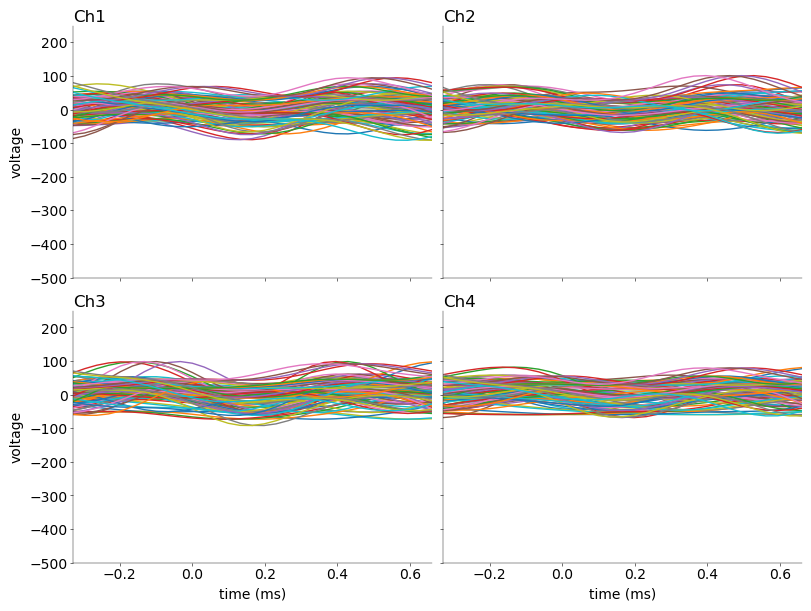

In [91]:
mosaic = [
    ["Ch1", "Ch2"],
    ["Ch3", "Ch4"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 6), layout="constrained", dpi=100
)

# -------------------------------
# plot first 100 spikes (0.5 pts)
# -------------------------------

# cols = ["Ch1", "Ch2", "Ch3", "Ch4"]
for i, col in enumerate(cols):
    ax[col].set_ylim((-500, 250))
    ax[col].set_xlim((-0.33, 0.66))
    ax[col].set_title(col, loc="left")
    if col == "Ch3" or col == "Ch4":
        ax[col].set_xlabel("time (ms)")
    else:
        ax[col].set_xticklabels([])
    if col == "Ch1" or col == "Ch3":
        ax[col].set_ylabel("voltage")
    else:
        ax[col].set_yticklabels([])

    X = np.linspace(-0.33, 0.66, 31)
    # first 100 spikes
    for j in range(100):
        ax[col].plot(X, waveforms[j, :, i])

Plot largest 100 spike waveforms

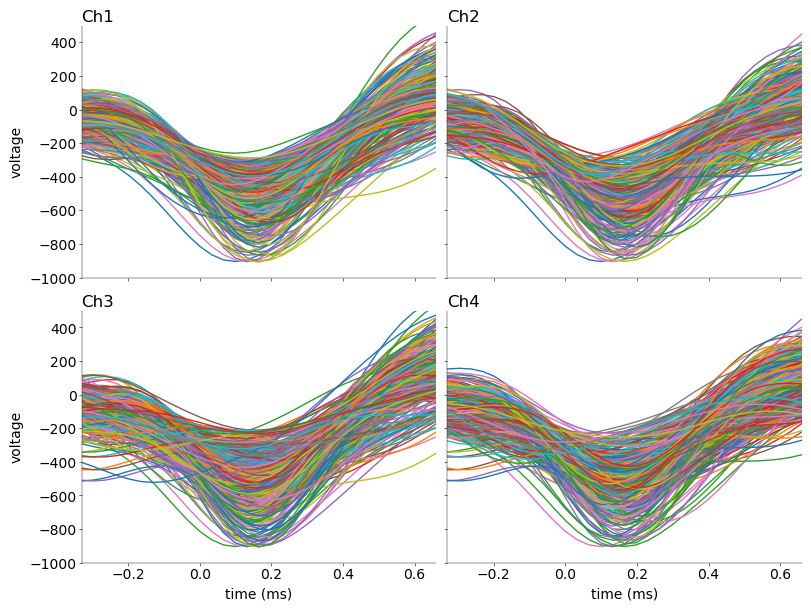

In [95]:
mosaic = [
    ["Ch1", "Ch2"],
    ["Ch3", "Ch4"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 6), layout="constrained", dpi=100
)

# -------------------------------------
# plot the largest 100 spikes (0.5 pts)
# -------------------------------------

# cols = ["Ch1", "Ch2", "Ch3", "Ch4"]
for i, col in enumerate(cols):
    ax[col].set_ylim((-1000, 500))
    ax[col].set_xlim((-0.33, 0.66))
    ax[col].set_title(col, loc="left")
    if col == "Ch3" or col == "Ch4":
        ax[col].set_xlabel("time (ms)")
    else:
        ax[col].set_xticklabels([])
    if col == "Ch1" or col == "Ch3":
        ax[col].set_ylabel("voltage")
    else:
        ax[col].set_yticklabels([])

    X = np.linspace(-0.33, 0.66, 31)

    # sort spikes by the peak (10th) index
    ws_sorted = waveforms[np.argsort(waveforms[:, 10, i])]
    # plot the 100 biggest
    for j in range(100):
        ax[col].plot(X, ws_sorted[j])

## Task 4: Extract features using PCA
Compute the first three PCA features on each channel separately in ```extract_features()``` (2 pts). You can use a available PCA implementation or implement it yourself. After that, each spike is represented by a 12 element vector. Compute the fraction of variance captured by these three PCs.
Plot scatter plots for all pairwise combinations of 1st PCs. Do you see clusters visually? 

*Grading: 2+1 pts*


### PCA:
- how to preprocess data?


(https://stats.stackexchange.com/questions/385775/normalizing-vs-scaling-before-pca)

In [ ]:
def extract_features(w: np.ndarray):
    """Extract features for spike sorting from the waveforms w.

    Do PCA on the waveforms of each channel separately,
    then concatenate the first three principal components
    of each channels into one numpy array (`b`).


    Parameter
    ---------

    w: np.ndarray, (n_spikes, length_window, n_channels)
        Waveforms from Task 3.


    Return
    ------

    b: np.ndarray, (n_spikes, n_feature)


    Notes
    -----

    You can use PCA from sklearn.

    More on PCA
    https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

    """

    # insert your code here

    # ---------------------------------------------
    # obtain first 3 principle components (2 pts)
    # ---------------------------------------------

    # -----------------------------------------------------
    # Print the fraction of variance explained (1 pt)
    # -----------------------------------------------------

    b = []

    for i in range(4):
        channel = w[:, :, i]

        pca = PCA(n_components=3)
        pca.fit(channel)
        b.append(pca.transform(channel))

        print(f"Ch{i+1} explained variance: {np.sum(pca.explained_variance_ratio_)}")

    b = np.hstack(np.array(b))
    return b

Ch1 explained variance: 0.9418800440514637
Ch2 explained variance: 0.9374893130710954
Ch3 explained variance: 0.939535874160339
Ch4 explained variance: 0.9406883250460376


Text(0.5, 0.98, 'Pairwise 1st PCs')

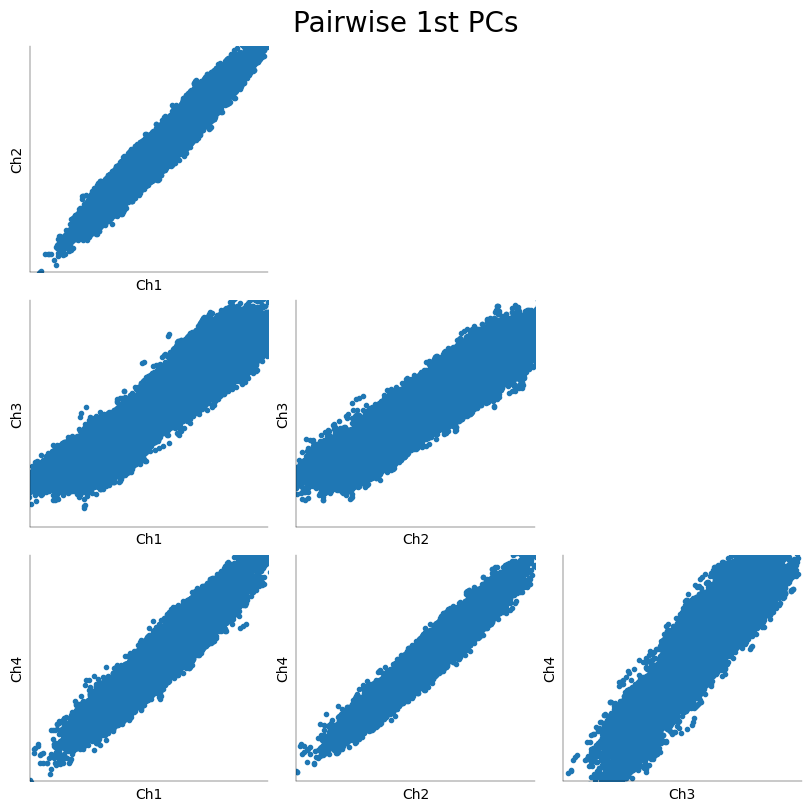

In [99]:
mosaic = [
    ["Ch2 vs Ch1", ".", "."],
    ["Ch3 vs Ch1", "Ch3 vs Ch2", "."],
    ["Ch4 vs Ch1", "Ch4 vs Ch2", "Ch4 vs Ch3"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 8), layout="constrained", dpi=100
)

b = extract_features(waveforms)

# indices of the 1st PC in `b`
i = {"Ch1": 0, "Ch2": 3, "Ch3": 6, "Ch4": 9}

for m in np.ravel(mosaic):
    if m == ".":
        continue
    y, x = m.split(" vs ")

    ax[m].set_xlabel(x)
    ax[m].set_ylabel(y)
    ax[m].set_xlim((-1500, 1500))
    ax[m].set_ylim((-1500, 1500))
    ax[m].set_xticks([])
    ax[m].set_yticks([])

    ax[m].scatter(b[:, i[m[:3]]], b[:, i[m[-3:]]])


fig.suptitle("Pairwise 1st PCs", fontsize=20)

In [ ]:
# # save data for the next Coding Lab

# np.save("../data/nds_cl_1_features", b)
# np.save("../data/nds_cl_1_spiketimes_s", s)
# np.save("../data/nds_cl_1_spiketimes_t", t)
# np.save("../data/nds_cl_1_waveforms", w)